In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


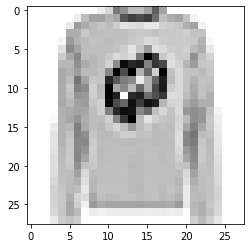

In [6]:
plt.imshow(X_train[123], cmap="binary")
plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train_n = X_train/X_train.max()
X_test_n = X_test/X_test.max()

In [12]:
model = tf.keras.models.Sequential()

# 2 hidden layer incl. input layer
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train_n.shape[1:])))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(Flatten())

# output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")

In [13]:
history = model.fit(X_train_n, y_train, validation_data=(X_test_n, y_test), epochs=200)

 - val_loss: 0.6764 - val_accuracy: 0.8779
Epoch 65/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0704 - accuracy: 0.9737 - val_loss: 0.6764 - val_accuracy: 0.8743
Epoch 66/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0698 - accuracy: 0.9738 - val_loss: 0.6758 - val_accuracy: 0.8763
Epoch 67/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0716 - accuracy: 0.9738 - val_loss: 0.7125 - val_accuracy: 0.8760
Epoch 68/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9748 - val_loss: 0.7110 - val_accuracy: 0.8757
Epoch 69/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0672 - accuracy: 0.9751 - val_loss: 0.7140 - val_accuracy: 0.8760
Epoch 70/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - accuracy: 0.9750 - val_loss: 0.7340 - val_accuracy: 0.8761
Epoch 71/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

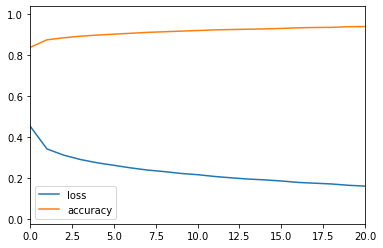

In [18]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.legend()
plt.xlim(0, 20)
plt.show()

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 128)           3712      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 64)            8256      
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                17930     
Total params: 29,898
Trainable params: 29,898
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.save("fashion_simple_nn")

INFO:tensorflow:Assets written to: fashion_simple_nn\assets
